In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [90]:
os.getcwd()

'F:\\New folder\\Batch67 Day33\\Project 12 Flight Price Predict Heroku'

In [91]:
os.chdir('F:\\New folder\\Batch67 Day33\\Project 12 Flight Price Predict Heroku\\')

In [92]:
os.getcwd()

'F:\\New folder\\Batch67 Day33\\Project 12 Flight Price Predict Heroku'

In [93]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840
10679,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
10680,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
10681,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759


In [94]:
len(df)

10683

In [95]:
df.shape

(10683, 11)

In [96]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [97]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [98]:
df.dropna(how='any',inplace=True)
display(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [99]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/05/2019' in DD/MM/YYYY format. Provide format or specif

In [100]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [101]:
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [102]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,3,1
1,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,3,1
2,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,3,1
3,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3
4,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,2019-03-27,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3
10679,SpiceJet,2019-03-21,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3
10680,SpiceJet,2019-03-27,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3
10681,SpiceJet,2019-03-04,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759,4,3


In [103]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,3,1
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,3,1
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,3,1
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759,4,3


In [104]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df.dtypes

Airline                     object
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Day_of_Journey               int64
Month_of_Journey             int64
dtype: object

In [105]:
df['Dep_hr']=(df['Dep_Time']).dt.hour
df['Dep_min']=(df['Dep_Time']).dt.minute
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,2023-02-24 05:45:00,11:25,5h 40m,1 stop,Business class,79512,3,1,5,45
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,2023-02-24 05:45:00,12:25,6h 40m,1 stop,Business class,62427,3,1,5,45
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,2023-02-24 09:45:00,14:25,4h 40m,1 stop,Business class,57209,3,1,9,45
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-02-24 18:40:00,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3,18,40
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2023-02-24 22:50:00,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3,22,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,2023-02-24 02:55:00,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3,2,55
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,2023-02-24 22:45:00,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3,22,45
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,2023-02-24 22:45:00,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3,22,45
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,2023-02-24 22:45:00,00:15 02 Apr,1h 30m,non-stop,No info,1759,4,3,22,45


In [106]:
df.drop(['Dep_Time'],axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,11:25,5h 40m,1 stop,Business class,79512,3,1,5,45
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,12:25,6h 40m,1 stop,Business class,62427,3,1,5,45
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,14:25,4h 40m,1 stop,Business class,57209,3,1,9,45
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3,18,40
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3,22,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3,2,55
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3,22,45
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3,22,45
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,1h 30m,non-stop,No info,1759,4,3,22,45


In [107]:
df['Duration']

0        5h 40m
1        6h 40m
2        4h 40m
3         6h 5m
4        6h 15m
          ...  
10678    1h 30m
10679    1h 25m
10680    1h 25m
10681    1h 30m
10682    1h 20m
Name: Duration, Length: 10682, dtype: object

In [108]:
duration=df['Duration'].str.split(' ',expand=True)
duration

,0,1
0,5h,40m
1,6h,40m
2,4h,40m
3,6h,5m
4,6h,15m
...,...,...
10678,1h,30m
10679,1h,25m
10680,1h,25m
10681,1h,30m


In [109]:
duration[1]

0        40m
1        40m
2        40m
3         5m
4        15m
        ... 
10678    30m
10679    25m
10680    25m
10681    30m
10682    20m
Name: 1, Length: 10682, dtype: object

In [110]:
duration[1].fillna('00m',inplace=True)
duration

,0,1
0,5h,40m
1,6h,40m
2,4h,40m
3,6h,5m
4,6h,15m
...,...,...
10678,1h,30m
10679,1h,25m
10680,1h,25m
10681,1h,30m


In [111]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,11:25,5h 40m,1 stop,Business class,79512,3,1,5,45
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,12:25,6h 40m,1 stop,Business class,62427,3,1,5,45
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,14:25,4h 40m,1 stop,Business class,57209,3,1,9,45
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3,18,40
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3,22,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3,2,55
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3,22,45
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3,22,45
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,1h 30m,non-stop,No info,1759,4,3,22,45


In [112]:
df['Duration_hr']=duration[0].str[:-1]
df['Duration_hr']

0        5
1        6
2        4
3        6
4        6
        ..
10678    1
10679    1
10680    1
10681    1
10682    1
Name: Duration_hr, Length: 10682, dtype: object

In [113]:
df['Duration_min']=duration[1].str[:-1]
df['Duration_min']

0        40
1        40
2        40
3         5
4        15
         ..
10678    30
10679    25
10680    25
10681    30
10682    20
Name: Duration_min, Length: 10682, dtype: object

In [114]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,11:25,5h 40m,1 stop,Business class,79512,3,1,5,45,5,40
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,12:25,6h 40m,1 stop,Business class,62427,3,1,5,45,6,40
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,14:25,4h 40m,1 stop,Business class,57209,3,1,9,45,4,40
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3,18,40,6,5
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3,22,50,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3,2,55,1,30
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3,22,45,1,25
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3,22,45,1,25
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,1h 30m,non-stop,No info,1759,4,3,22,45,1,30


In [115]:
df.drop(['Duration'],axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,11:25,1 stop,Business class,79512,3,1,5,45,5,40
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,12:25,1 stop,Business class,62427,3,1,5,45,6,40
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,14:25,1 stop,Business class,57209,3,1,9,45,4,40
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,00:45 16 Mar,1 stop,No info,54826,18,3,18,40,6,5
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 16 Mar,1 stop,No info,54826,18,3,22,50,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,04:25,non-stop,In-flight meal not included,1840,27,3,2,55,1,30
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 22 Mar,non-stop,No info,1759,21,3,22,45,1,25
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 28 Mar,non-stop,No info,1759,27,3,22,45,1,25
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,non-stop,No info,1759,4,3,22,45,1,30


In [116]:
df.columns
print(type(df.columns))
print(df.columns)

<class 'pandas.core.indexes.base.Index'>
Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Duration_hr', 'Duration_min'],
      dtype='object')


In [117]:
Airprices=df.groupby('Airline')['Price']
Airprices

In [118]:
cv=df.groupby('Airline').size()
cv

Airline
Air Asia                              319
Air India                            1751
GoAir                                 194
IndiGo                               2053
Jet Airways                          3849
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              818
Trujet                                  1
Vistara                               479
Vistara Premium economy                 3
dtype: int64

In [119]:
mn=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
mn

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

In [120]:
print(mn.index)
print(mn.values)

Index(['Jet Airways Business', 'Jet Airways',
       'Multiple carriers Premium economy', 'Multiple carriers', 'Air India',
       'Vistara Premium economy', 'Vistara', 'GoAir', 'IndiGo', 'Air Asia',
       'SpiceJet', 'Trujet'],
      dtype='object', name='Airline')
[58358.66666667 11643.92335672 11418.84615385 10902.67809365
  9612.42775557  8962.33333333  7796.34864301  5861.05670103
  5673.68290307  5590.26018809  4338.28484108  4140.        ]


In [121]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [122]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [123]:
for k in df:
    
    if k=='Destination':
        df['Destination'].replace('New Delhi','Delhi',inplace=True)
df

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min
0,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,11:25,1 stop,Business class,79512,3,1,5,45,5,40
1,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,12:25,1 stop,Business class,62427,3,1,5,45,6,40
2,Jet Airways Business,Banglore,Delhi,BLR → MAA → DEL,14:25,1 stop,Business class,57209,3,1,9,45,4,40
3,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,00:45 16 Mar,1 stop,No info,54826,18,3,18,40,6,5
4,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,05:05 16 Mar,1 stop,No info,54826,18,3,22,50,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,04:25,non-stop,In-flight meal not included,1840,27,3,2,55,1,30
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 22 Mar,non-stop,No info,1759,21,3,22,45,1,25
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 28 Mar,non-stop,No info,1759,27,3,22,45,1,25
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,non-stop,No info,1759,4,3,22,45,1,30


In [124]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [125]:
df['Destination'].unique()

array(['Delhi', 'Cochin', 'Banglore', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [126]:
df.head(4)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min
0,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,11:25,1 stop,Business class,79512,3,1,5,45,5,40
1,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,12:25,1 stop,Business class,62427,3,1,5,45,6,40
2,Jet Airways Business,Banglore,Delhi,BLR → MAA → DEL,14:25,1 stop,Business class,57209,3,1,9,45,4,40
3,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,00:45 16 Mar,1 stop,No info,54826,18,3,18,40,6,5


In [127]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})
df

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min
0,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,11:25,1,Business class,79512,3,1,5,45,5,40
1,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,12:25,1,Business class,62427,3,1,5,45,6,40
2,Jet Airways Business,Banglore,Delhi,BLR → MAA → DEL,14:25,1,Business class,57209,3,1,9,45,4,40
3,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,00:45 16 Mar,1,No info,54826,18,3,18,40,6,5
4,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,05:05 16 Mar,1,No info,54826,18,3,22,50,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,04:25,0,In-flight meal not included,1840,27,3,2,55,1,30
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 22 Mar,0,No info,1759,21,3,22,45,1,25
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 28 Mar,0,No info,1759,27,3,22,45,1,25
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,0,No info,1759,4,3,22,45,1,30


In [128]:
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
air_dummy

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,1,0,0,0,0,0,0,0
10679,0,0,0,0,0,0,0,1,0,0,0
10680,0,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,1,0,0,0


In [129]:
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
source_dest_dummy

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,0,1,0,0,1,0
10679,0,0,0,1,0,0,1,0
10680,0,0,0,1,0,0,1,0
10681,0,0,0,1,0,0,1,0


In [130]:
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)
df

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min
0,0,0,0,0,1,0,0,0,0,0,...,11:25,1,Business class,79512,3,1,5,45,5,40
1,0,0,0,0,1,0,0,0,0,0,...,12:25,1,Business class,62427,3,1,5,45,6,40
2,0,0,0,0,1,0,0,0,0,0,...,14:25,1,Business class,57209,3,1,9,45,4,40
3,0,0,0,1,0,0,0,0,0,0,...,00:45 16 Mar,1,No info,54826,18,3,18,40,6,5
4,0,0,0,1,0,0,0,0,0,0,...,05:05 16 Mar,1,No info,54826,18,3,22,50,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,1,0,0,0,0,0,0,...,04:25,0,In-flight meal not included,1840,27,3,2,55,1,30
10679,0,0,0,0,0,0,0,1,0,0,...,00:10 22 Mar,0,No info,1759,21,3,22,45,1,25
10680,0,0,0,0,0,0,0,1,0,0,...,00:10 28 Mar,0,No info,1759,27,3,22,45,1,25
10681,0,0,0,0,0,0,0,1,0,0,...,00:15 02 Apr,0,No info,1759,4,3,22,45,1,30


In [131]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Route', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Duration_hr', 'Duration_min'],
      dtype='object')

In [132]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
display(df.head())

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min,Arrival_hr,Arrival_min
0,0,0,0,0,1,0,0,0,0,0,...,Business class,79512,3,1,5,45,5,40,11,25
1,0,0,0,0,1,0,0,0,0,0,...,Business class,62427,3,1,5,45,6,40,12,25
2,0,0,0,0,1,0,0,0,0,0,...,Business class,57209,3,1,9,45,4,40,14,25
3,0,0,0,1,0,0,0,0,0,0,...,No info,54826,18,3,18,40,6,5,0,45
4,0,0,0,1,0,0,0,0,0,0,...,No info,54826,18,3,22,50,6,15,5,5


In [133]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Route', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Duration_hr', 'Duration_min',
       'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [134]:
df.drop(["Arrival_Time"],axis=1,inplace=True)
display(df.head())

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min,Arrival_hr,Arrival_min
0,0,0,0,0,1,0,0,0,0,0,...,Business class,79512,3,1,5,45,5,40,11,25
1,0,0,0,0,1,0,0,0,0,0,...,Business class,62427,3,1,5,45,6,40,12,25
2,0,0,0,0,1,0,0,0,0,0,...,Business class,57209,3,1,9,45,4,40,14,25
3,0,0,0,1,0,0,0,0,0,0,...,No info,54826,18,3,18,40,6,5,0,45
4,0,0,0,1,0,0,0,0,0,0,...,No info,54826,18,3,22,50,6,15,5,5


In [135]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_min', 'Duration_hr', 'Duration_min', 'Arrival_hr',
       'Arrival_min'],
      dtype='object')

In [136]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)
df

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min,Arrival_hr,Arrival_min
0,0,0,0,0,1,0,0,0,0,0,...,Business class,79512,3,1,5,45,5,40,11,25
1,0,0,0,0,1,0,0,0,0,0,...,Business class,62427,3,1,5,45,6,40,12,25
2,0,0,0,0,1,0,0,0,0,0,...,Business class,57209,3,1,9,45,4,40,14,25
3,0,0,0,1,0,0,0,0,0,0,...,No info,54826,18,3,18,40,6,5,0,45
4,0,0,0,1,0,0,0,0,0,0,...,No info,54826,18,3,22,50,6,15,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,1,0,0,0,0,0,0,...,In-flight meal not included,1840,27,3,2,55,1,30,4,25
10679,0,0,0,0,0,0,0,1,0,0,...,No info,1759,21,3,22,45,1,25,0,10
10680,0,0,0,0,0,0,0,1,0,0,...,No info,1759,27,3,22,45,1,25,0,10
10681,0,0,0,0,0,0,0,1,0,0,...,No info,1759,4,3,22,45,1,30,0,15


In [137]:
df_test=pd.read_excel('Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [138]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [139]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specif

In [140]:
df_test['Dep_Time']=pd.to_datetime(df_test['Dep_Time'])
df_test['Arrival_Time']=pd.to_datetime(df_test['Arrival_Time'])
df_test['dep_hr']=(df_test['Dep_Time'].dt.hour)
df_test['dep_min']=(df_test['Dep_Time'].dt.minute)
df_test['Arrival_hr']=(df_test['Arrival_Time'].dt.hour)
df_test['Arrival_min']=(df_test['Arrival_Time'].dt.minute)
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2023-02-24 17:30:00,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2023-02-24 06:20:00,2023-02-24 10:20:00,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2023-02-24 19:15:00,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2023-02-24 08:00:00,2023-02-24 21:00:00,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2023-02-24 23:55:00,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2023-02-24 20:30:00,2023-06-07 20:25:00,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2023-02-24 14:20:00,2023-02-24 16:55:00,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2023-02-24 21:50:00,2023-03-07 04:25:00,6h 35m,1 stop,No info,3,6,21,50,4,25
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2023-02-24 04:00:00,2023-02-24 19:15:00,15h 15m,1 stop,No info,3,6,4,0,19,15


In [141]:
a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
a

,0,1
0,10h,55m
1,4h,00m
2,23h,45m
3,13h,00m
4,2h,50m
...,...,...
2666,23h,55m
2667,2h,35m
2668,6h,35m
2669,15h,15m


In [142]:
df_test['Duration_hr']=a[0].str[:-1]
df_test['Duration_hr']
df_test['Duration_min']=a[1].str[:-1]
df_test['Duration_min']
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2023-02-24 17:30:00,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2023-02-24 06:20:00,2023-02-24 10:20:00,4h,1 stop,No info,5,12,6,20,10,20,4,00
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2023-02-24 19:15:00,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2023-02-24 08:00:00,2023-02-24 21:00:00,13h,1 stop,No info,21,5,8,0,21,0,13,00
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2023-02-24 23:55:00,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2023-02-24 20:30:00,2023-06-07 20:25:00,23h 55m,1 stop,No info,6,6,20,30,20,25,23,55
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2023-02-24 14:20:00,2023-02-24 16:55:00,2h 35m,non-stop,No info,27,3,14,20,16,55,2,35
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2023-02-24 21:50:00,2023-03-07 04:25:00,6h 35m,1 stop,No info,3,6,21,50,4,25,6,35
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2023-02-24 04:00:00,2023-02-24 19:15:00,15h 15m,1 stop,No info,3,6,4,0,19,15,15,15


In [143]:
df_test.drop(['Date_of_Journey','Duration','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [144]:
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)
display (df_test.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Destination_New Delhi,Total_Stops,Day_of_Journey,Month_of_Journey,dep_hr,dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,0,0,0,1,0,0,0,0,0,0,...,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,0,1,5,12,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,...,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,0,1,21,5,8,0,21,0,13,00


In [145]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [146]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Duration_hr', 'Duration_min',
       'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [147]:
x=df.drop(['Route','Additional_Info','Price'],axis=1)
y=df['Price']
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Duration_hr,Duration_min,Arrival_hr,Arrival_min
0,0,0,0,0,1,0,0,0,0,0,...,0,1,3,1,5,45,5,40,11,25
1,0,0,0,0,1,0,0,0,0,0,...,0,1,3,1,5,45,6,40,12,25
2,0,0,0,0,1,0,0,0,0,0,...,0,1,3,1,9,45,4,40,14,25


In [148]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

In [149]:
ET_model=ExtraTreesRegressor()
ET_model.fit(x,y)

ExtraTreesRegressor()

In [150]:
y_pred=ET_model.predict(x)
display(r2_score(y,y_pred))

0.9633110726225342

<AxesSubplot:>

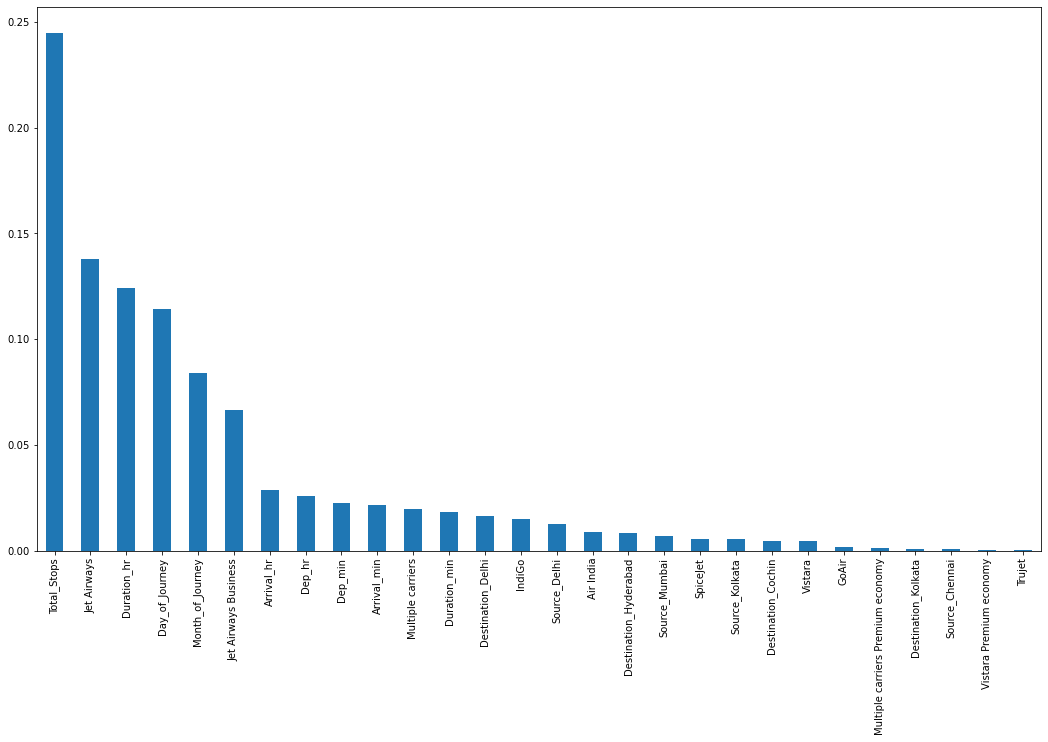

In [151]:
pd.Series(ET_model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [152]:
x.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_min', 'Duration_hr', 'Duration_min', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [153]:
ET_model.feature_importances_

array([8.74026838e-03, 1.85698356e-03, 1.49046710e-02, 1.38040269e-01,
       6.64545134e-02, 1.98723635e-02, 1.03952185e-03, 5.58594470e-03,
       8.14451157e-05, 4.50919535e-03, 1.00515526e-04, 7.92927403e-04,
       1.23544107e-02, 5.25293565e-03, 6.74390553e-03, 4.54114113e-03,
       1.63563589e-02, 8.50129081e-03, 8.37292959e-04, 2.44776380e-01,
       1.14184329e-01, 8.41148796e-02, 2.55811801e-02, 2.22938767e-02,
       1.24310102e-01, 1.82000463e-02, 2.84037653e-02, 2.15694852e-02])

In [154]:
x.shape

(10682, 28)

In [155]:
y.shape

(10682,)

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 28)
(2137, 28)
(8545,)
(2137,)


In [157]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model=ExtraTreesRegressor(n_estimators=120)
ET_model.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [158]:
y_predict=ET_model.predict(x_test)
display(r2_score(y_test,y_predict))

0.7993243572125438

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
rm=RandomForestRegressor(n_estimators=120)
rm.fit(x_train,y_train)

RandomForestRegressor(n_estimators=120)

In [161]:
rm_pred=rm.predict(x_test)
display(r2_score(y_test,rm_pred))

0.7820690556139706

In [162]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [163]:
rCV.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [164]:
rf_pred=rCV.predict(x_test)
display(r2_score(y_test,rf_pred))

0.794775598324414

In [165]:
from catboost import CatBoostRegressor

In [166]:
cav=CatBoostRegressor()
cav.fit(x_train,y_train)
cav_pred=cav.predict(x_test)
display(r2_score(y_test,cav_pred))

Learning rate set to 0.057463
0:	learn: 4372.0447421	total: 11.3ms	remaining: 11.3s
1:	learn: 4223.5857187	total: 17ms	remaining: 8.48s
2:	learn: 4077.7825689	total: 22.8ms	remaining: 7.59s
3:	learn: 3948.9295285	total: 29ms	remaining: 7.23s
4:	learn: 3831.4619020	total: 36.6ms	remaining: 7.29s
5:	learn: 3708.5264032	total: 41.9ms	remaining: 6.95s
6:	learn: 3605.1113113	total: 45.7ms	remaining: 6.48s
7:	learn: 3511.5792355	total: 49.7ms	remaining: 6.16s
8:	learn: 3426.6449825	total: 53.5ms	remaining: 5.89s
9:	learn: 3340.7089713	total: 57.8ms	remaining: 5.72s
10:	learn: 3260.6117321	total: 61.2ms	remaining: 5.5s
11:	learn: 3194.2167743	total: 64.5ms	remaining: 5.31s
12:	learn: 3131.2019900	total: 68.7ms	remaining: 5.21s
13:	learn: 3071.4166677	total: 72.8ms	remaining: 5.13s
14:	learn: 3010.7944799	total: 76.6ms	remaining: 5.03s
15:	learn: 2968.3581734	total: 80ms	remaining: 4.92s
16:	learn: 2921.3817069	total: 83.4ms	remaining: 4.82s
17:	learn: 2880.8865719	total: 86.9ms	remaining: 4.7

0.8560587091497688